In [0]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [13]:
model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1) )
criterion = nn.NLLLoss()
# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)
logits = model(images)
loss = criterion(logits,labels)
print(loss)


tensor(2.2866, grad_fn=<NllLossBackward>)


In [21]:
model

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)

In [14]:
logits

tensor([[-2.3004, -2.1908, -2.2618, -2.2485, -2.3655, -2.2482, -2.4728, -2.0899,
         -2.5155, -2.4095],
        [-2.3113, -2.2104, -2.2233, -2.3082, -2.3080, -2.3073, -2.4139, -2.0780,
         -2.4951, -2.4372],
        [-2.3713, -2.2529, -2.2853, -2.2399, -2.2573, -2.2934, -2.3947, -2.0745,
         -2.4787, -2.4406],
        [-2.3453, -2.2432, -2.2815, -2.2732, -2.2895, -2.2846, -2.4395, -2.0752,
         -2.4792, -2.3723],
        [-2.3894, -2.1669, -2.3012, -2.2917, -2.2747, -2.2603, -2.4192, -2.1279,
         -2.4548, -2.3920],
        [-2.3428, -2.1467, -2.2957, -2.2988, -2.3041, -2.2811, -2.4029, -2.0692,
         -2.4982, -2.4649],
        [-2.3469, -2.2027, -2.2839, -2.3331, -2.3265, -2.2248, -2.4782, -2.0598,
         -2.4346, -2.4055],
        [-2.2973, -2.2276, -2.3156, -2.2684, -2.3351, -2.2342, -2.3560, -2.0892,
         -2.4846, -2.4806],
        [-2.4053, -2.1789, -2.2766, -2.2953, -2.2398, -2.3585, -2.4267, -2.0731,
         -2.4401, -2.3979],
        [-2.3601, -

## **The AutoGrad**

In [15]:
x = torch.randn(2,2, requires_grad=True)
print(x)

tensor([[-0.4080, -0.2358],
        [ 0.2004, -1.2097]], requires_grad=True)


In [16]:
y = x**2
print(y)

tensor([[0.1665, 0.0556],
        [0.0401, 1.4633]], grad_fn=<PowBackward0>)


In [17]:
z = y.mean()
print(z)

tensor(0.4314, grad_fn=<MeanBackward0>)


In [19]:
print(y.grad)

None


/usr/local/lib/python3.6/dist-packages/torch/tensor.py:746: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  warnings.warn("The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad "


In [20]:
z.backward()

print(x.grad)
print(x/2)

tensor([[-0.2040, -0.1179],
        [ 0.1002, -0.6048]])
tensor([[-0.2040, -0.1179],
        [ 0.1002, -0.6048]], grad_fn=<DivBackward0>)


**loss and autograder together**

In [22]:
print("before backward : \n",model[0].weight.grad)
loss.backward()
print("after backward : \n",model[0].weight.grad)

before backward : 
 None
after backward : 
 tensor([[-9.7349e-05, -9.7349e-05, -9.7349e-05,  ..., -9.7349e-05,
         -9.7349e-05, -9.7349e-05],
        [ 1.1921e-03,  1.1921e-03,  1.1921e-03,  ...,  1.1921e-03,
          1.1921e-03,  1.1921e-03],
        [ 4.3366e-03,  4.3366e-03,  4.3366e-03,  ...,  4.3366e-03,
          4.3366e-03,  4.3366e-03],
        ...,
        [ 2.2473e-03,  2.2473e-03,  2.2473e-03,  ...,  2.2473e-03,
          2.2473e-03,  2.2473e-03],
        [ 2.8787e-04,  2.8787e-04,  2.8787e-04,  ...,  2.8787e-04,
          2.8787e-04,  2.8787e-04],
        [-7.9090e-05, -7.9090e-05, -7.9090e-05,  ..., -7.9090e-05,
         -7.9090e-05, -7.9090e-05]])


**Optimization**

In [0]:
from torch import optim
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [24]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0039, -0.0115,  0.0103,  ...,  0.0288,  0.0266, -0.0074],
        [-0.0177,  0.0051,  0.0097,  ..., -0.0163, -0.0219, -0.0325],
        [-0.0124,  0.0023, -0.0174,  ..., -0.0295, -0.0019, -0.0195],
        ...,
        [-0.0150, -0.0153,  0.0096,  ..., -0.0058, -0.0098,  0.0066],
        [-0.0040,  0.0246,  0.0352,  ...,  0.0268,  0.0033,  0.0118],
        [ 0.0237, -0.0038,  0.0240,  ..., -0.0350,  0.0350, -0.0193]],
       requires_grad=True)
Gradient - tensor([[-0.0010, -0.0010, -0.0010,  ..., -0.0010, -0.0010, -0.0010],
        [-0.0015, -0.0015, -0.0015,  ..., -0.0015, -0.0015, -0.0015],
        [ 0.0044,  0.0044,  0.0044,  ...,  0.0044,  0.0044,  0.0044],
        ...,
        [ 0.0017,  0.0017,  0.0017,  ...,  0.0017,  0.0017,  0.0017],
        [ 0.0033,  0.0033,  0.0033,  ...,  0.0033,  0.0033,  0.0033],
        [-0.0001, -0.0001, -0.0001,  ..., -0.0001, -0.0001, -0.0001]])


In [25]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0039, -0.0115,  0.0103,  ...,  0.0288,  0.0266, -0.0074],
        [-0.0177,  0.0051,  0.0097,  ..., -0.0163, -0.0219, -0.0325],
        [-0.0124,  0.0022, -0.0174,  ..., -0.0296, -0.0019, -0.0195],
        ...,
        [-0.0150, -0.0153,  0.0096,  ..., -0.0058, -0.0098,  0.0066],
        [-0.0040,  0.0245,  0.0351,  ...,  0.0268,  0.0033,  0.0117],
        [ 0.0237, -0.0038,  0.0240,  ..., -0.0350,  0.0350, -0.0193]],
       requires_grad=True)


In [27]:


model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.871593421964503
Training loss: 0.8466294877755363
Training loss: 0.5242825607691747
Training loss: 0.42840172348818034
Training loss: 0.38501152666265775


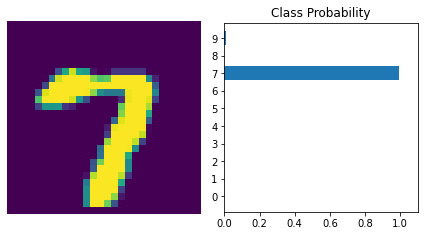

In [50]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)